**Import Libaries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


**Load CSV files**

In [ ]:
df = pd.read_csv("heart_disease.csv")

In [ ]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [ ]:
df.shape

(10000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

**DATA CLEANNING**

In [ ]:
df.isnull().sum() #checking null values

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


**Checking duplicates values**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop(["Alcohol Consumption"],axis = 1)

**Handling missing values in categorical columns**

In [ ]:
list1 = df.describe(include=["O"]).columns
for item in list1:
  df[item]=df[item].fillna(df[item].mode()[0])

In [ ]:
list2 = df.describe().columns
for item in list2:
  df[item] = df[item].fillna(df[item].median())

**Chucking Missing values**

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


**VISUALIZATIONS**

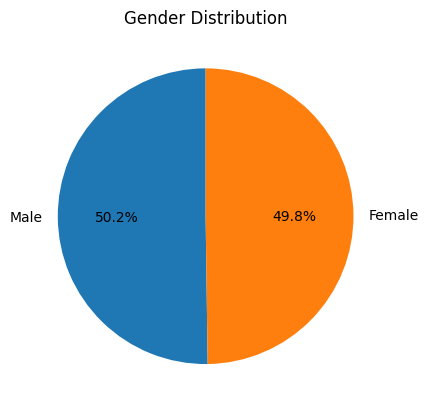

In [ ]:
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


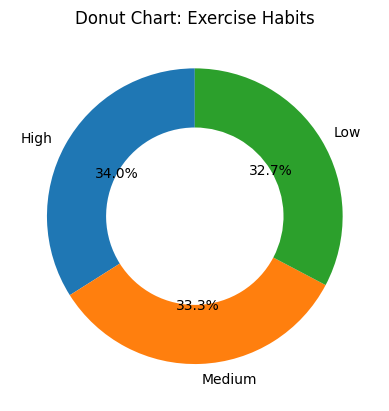

In [ ]:
exercise_counts = df['Exercise Habits'].value_counts()
plt.pie(exercise_counts, labels=exercise_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title("Donut Chart: Exercise Habits")
plt.show()


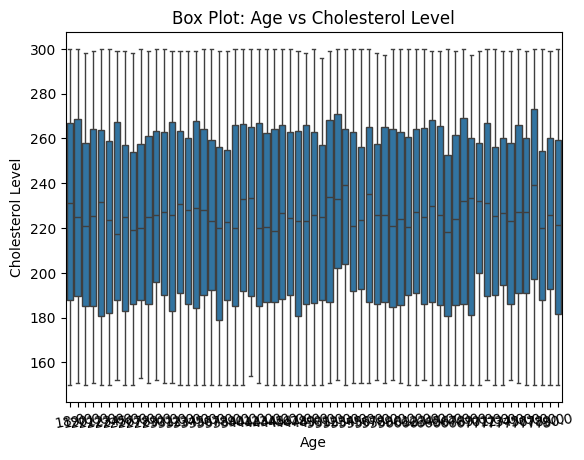

In [ ]:
sns.boxplot(x='Age', y='Cholesterol Level', data=df)
plt.title("Box Plot: Age vs Cholesterol Level")
plt.xticks(rotation=10)
plt.show()


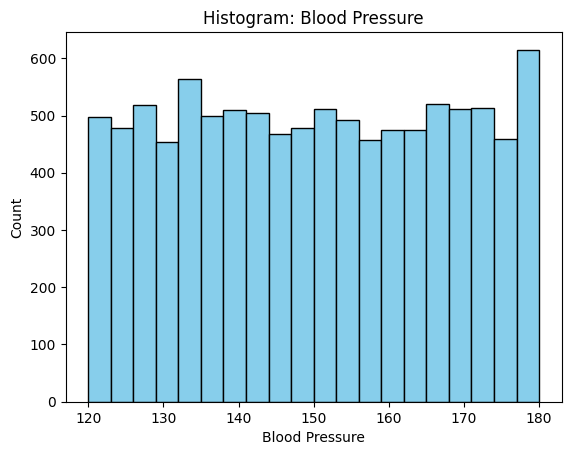

In [ ]:
plt.hist(df['Blood Pressure'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title("Histogram: Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Count")
plt.show()


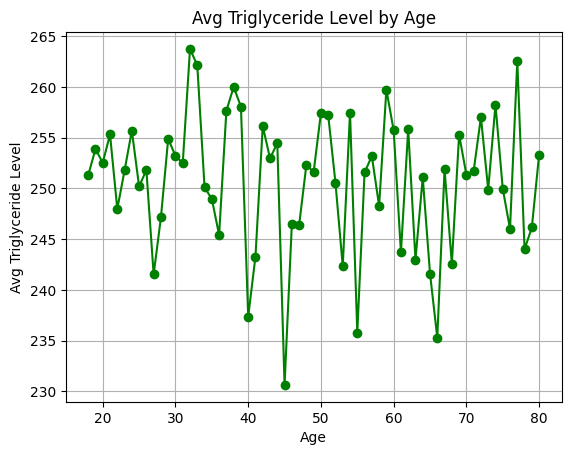

In [ ]:
avg_trig = df.groupby('Age')['Triglyceride Level'].mean()
plt.plot(avg_trig.index, avg_trig.values, marker='o', color='green')
plt.title("Avg Triglyceride Level by Age")
plt.xlabel("Age")
plt.ylabel("Avg Triglyceride Level")
plt.grid(True)
plt.show()


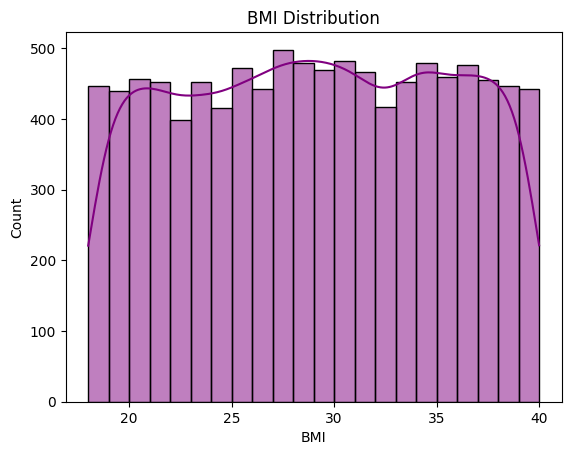

In [ ]:
sns.histplot(df['BMI'], kde=True, color='purple')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()


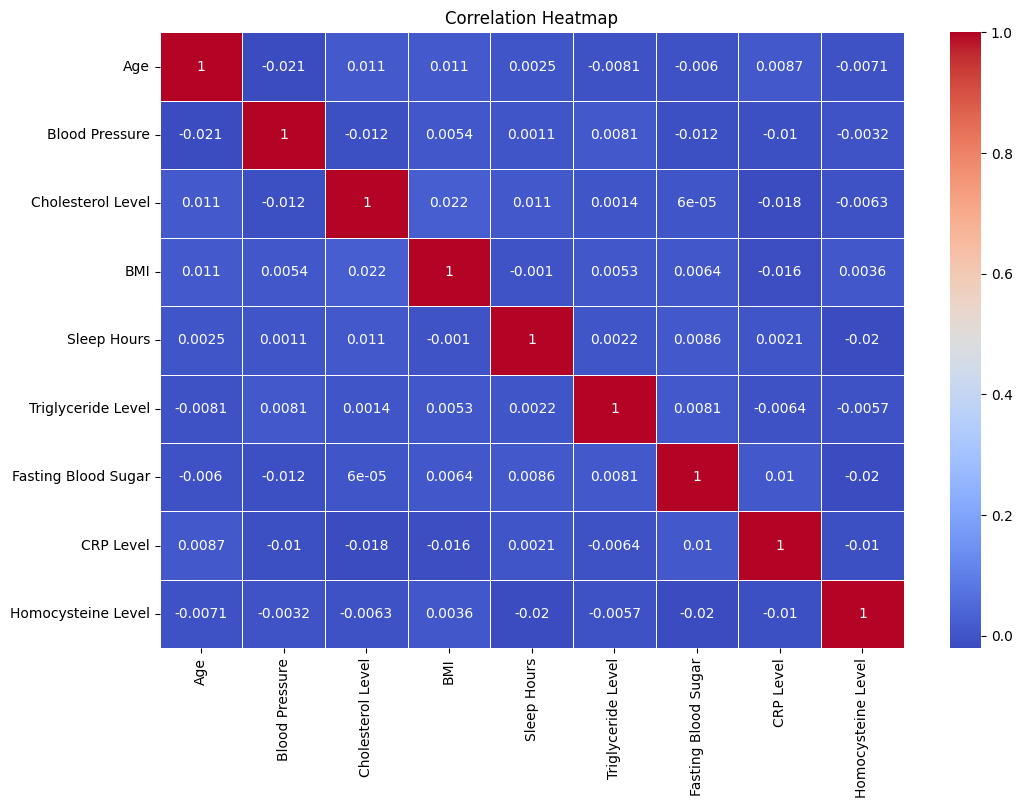

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**Encodeing Categorical Variables**

In [ ]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
df.fillna(df.median(numeric_only=True), inplace=True)

**Defining Features - "x" and Target - "Y"**

In [ ]:
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

**Train/Test split and Standardize**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Training and Evaluateing**

In [49]:
models = {
    "KNN": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)

    if name == "Linear Regression":
        y_pred = np.where(model.predict(X_test) >= 0.5, 1, 0)
    else:
        y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")
    results[name] = acc

KNN Accuracy: 0.77
GaussianNB Accuracy: 0.81
Linear Regression Accuracy: 0.81
Logistic Regression Accuracy: 0.81
SVM Accuracy: 0.81
Decision Tree Accuracy: 0.65
AdaBoost Accuracy: 0.81
Gradient Boost Accuracy: 0.81


**Comparing Model Accuraciey**

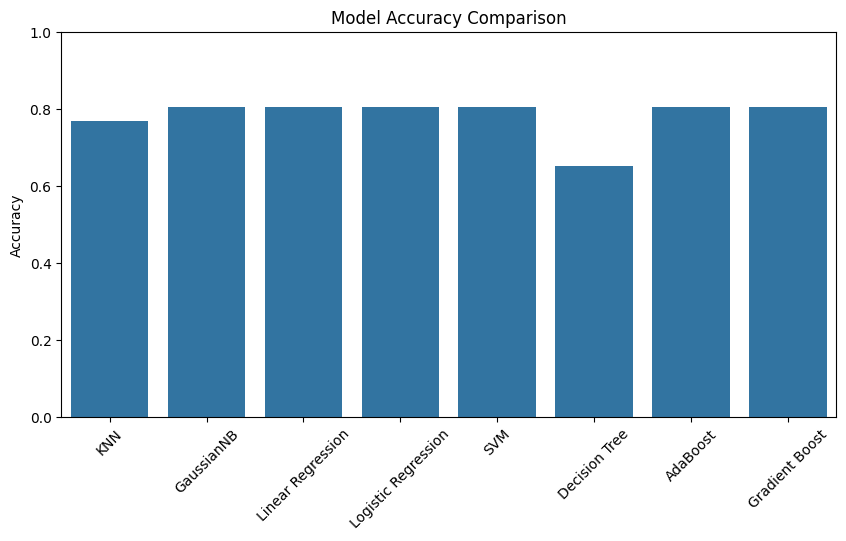

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()